# **Trabajo Fin de Master**

### Miguel Angel Ortega Duran 

### Samuel Martínez Camacho

# **Discriminador imagenes MRI**

En este modelo lo que se busca es diferenciar entre imágenes de resonancia magnética e imágenes de otro tipo para que la aplicación web no continue con la preddicción del tipo de tumor si no corresponde con la imagen adecuada.

Para lograr este objetivo, hemos usado el primer modelo que realizamos, y hemos usado por un lado imágenes random y por otro lado imágenes mri.

<img src=https://ichef.bbci.co.uk/news/800/cpsprodpb/9039/production/_110812963_gettyimages-966248982.jpg>



Estas son las librerías que vamos a importar:

* **os**: proporciona funciones para interactuar con el sistema operativo, por ejemplo, para manipular archivos y carpetas.

* **glob**: proporciona una manera fácil de buscar archivos y directorios que cumplan con un patrón determinado.

* **shutil**: proporciona funciones para manipular archivos y carpetas, incluyendo copiar y mover archivos.

* **random**: proporciona funciones para generar números aleatorios.

* **pandas**: es una librería de análisis de datos que proporciona estructuras de datos eficientes para trabajar con datos en Python.

* **PIL** (Python Imaging Library): proporciona funciones para manipular imágenes.

* **numpy**: es una librería de cálculo numérico que proporciona funciones para trabajar con arrays y matrices.

* **seaborn**: es una librería de visualización de datos basada en matplotlib que proporciona una manera fácil de crear gráficos estadísticos.

* **matplotlib**: es una librería de visualización de datos que proporciona una amplia variedad de funciones para crear gráficos y visualizaciones.

* **sklearn**: es una librería de aprendizaje automático que proporciona una amplia variedad de algoritmos de aprendizaje automático y funciones para evaluación y selección de modelos.

* **keras**: es una librería de aprendizaje profundo que proporciona una interfaz de alto nivel para crear y entrenar modelos de redes neuronales.

* **ImageDataGenerator**: es una clase en la librería keras.preprocessing.image que proporciona funciones para preprocesar y generar imágenes de forma automática.

Estas librerías son útiles para realizar tareas como cargar y preprocesar datos, crear y entrenar modelos de Deep Learning, y visualizar los resultados.

In [ ]:
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from sklearn.model_selection import train_test_split
import keras
from keras.metrics import AUC, Recall, Precision
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D , MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La función "importing_data" carga los datos de imágenes de las carpetas (img_no, img_yes, img_pred) en la lista "sample". La función usa la función "glob" para cargar todos los archivos con extensión '.jpg' en el directorio especificado por "path".

Después de cargar los datos en la lista "sample", la función los devuelve.

Creamos tres variables (train_n, train_y, test) que almacenan los datos cargados en cada una de las carpetas (img_no, img_yes, img_pred) respectivamente.

Luego, creamos tres dataframes (df_train_n, df_train_y, df_test) que almacenan la información sobre las imágenes en la variable correspondiente y las etiquetamos con la clase "Sano" o "Afectado".

Finalmente, se combinan los tres dataframes en un solo dataframe llamado "train_data".

In [ ]:
def importing_data(path):
  sample = [] 
  for filename in glob.glob(path): # subimos los datos requeridos 
    sample.append(filename)
  return sample

# ruta del conjunto de datos
img_img = '/content/drive/MyDrive/Imagen /discriminador_mri/Images/*.jpg' # datos de cerebro sano
img_mri = '/content/drive/MyDrive/Imagen /discriminador_mri/mri/*.jpg' # datos de tumor cerebral
img_pred = '/content/drive/MyDrive/Imagen /discriminador_mri/pred/*.jpg' # datos de testing de imagenes

# importamos los datos dentro de las variables  
train_img = importing_data(img_img)
train_mri = importing_data(img_mri)
test = importing_data(img_pred)

# creacion del dataset
# para un fácil acceso a los datos que etiquetan cada carpeta en un formulario csv si es un cerebro sano o afectado
df_train_img = pd.DataFrame({'image':train_img, 'target': 'random'})
df_train_mri = pd.DataFrame({'image':train_mri, 'target': 'mri'})
df_test = pd.DataFrame({'image':test})
train_data = pd.concat([df_train_img, df_train_mri])
train_data

,image,target
0,/content/drive/MyDrive/Imagen /discriminador_m...,random
1,/content/drive/MyDrive/Imagen /discriminador_m...,random
2,/content/drive/MyDrive/Imagen /discriminador_m...,random
3,/content/drive/MyDrive/Imagen /discriminador_m...,random
4,/content/drive/MyDrive/Imagen /discriminador_m...,random
...,...,...
9955,/content/drive/MyDrive/Imagen /discriminador_m...,mri
9956,/content/drive/MyDrive/Imagen /discriminador_m...,mri
9957,/content/drive/MyDrive/Imagen /discriminador_m...,mri
9958,/content/drive/MyDrive/Imagen /discriminador_m...,mri


### Visualizamos una imagen mri. 

Se utiliza la función "imread" de la biblioteca "matplotlib.image" para leer la imagen en la ruta especificada.

La función "imshow" de "matplotlib.pyplot" para mostrar la imagen en una ventana emergente.

Se establecen título ***mri***, laetiquetas de ejes ***x e y***.

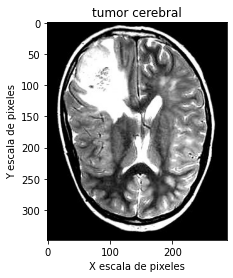

In [ ]:
# una muestra de visualización de la imagen cancerosa
plt.title("mri")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /discriminador_mri/mri/Tr-piTr_0009.jpg")
plt.imshow(image)
plt.show()

### Visualizamos una imagen que no es mri. 



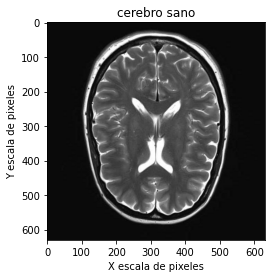

In [ ]:
# una muestra de visualización de la imagen sana
plt.title("random")
plt.xlabel("X escala de pixeles")
plt.ylabel("Y escala de pixeles")
 
image = mpimg.imread("/content/drive/MyDrive/Imagen /discriminador_mri/Images/08ece5aaf31b11e2a3e722000a9f09d0_7.jpg")
plt.imshow(image)
plt.show()

Dividimos el conjunto de datos de entrenamiento en dos partes: un conjunto de entrenamiento y un conjunto de validación. 

Se utiliza la función "train_test_split" de la biblioteca "sklearn.model_selection" para esto.

La función divide el conjunto de datos de entrenamiento "train_data" en dos partes: "X_train" y "X_val". 

La variable "X_train" contiene el 90% de los datos de entrenamiento y "X_val" contiene el 10% restante de los datos. 

La variable "test_size" especifica la fracción de datos que se utilizarán para la validación y se establece en 10%. 

La variable "shuffle" se establece en "True" para mezclar los datos antes de dividirlos. 

La variable "random_state" se establece en 42 para garantizar que los mismos datos se dividan de la misma manera cada vez que se ejecuta el código.

In [ ]:
# división train-validation (90% train - 10% validation)
X_train, X_test = train_test_split(train_data,
                                  test_size = 0.1,
                                  shuffle = True,
                                  random_state = 42)

La función "build_model" crea un modelo secuencial, que es una forma de crear modelos de redes neuronales secuenciales, de esta forma las capas se añaden secuencialmente una tras otra.

El modelo consta de varias capas de Conv2D, que son las capas de la red neuronal convulacional que realizan la extracción de características de las imágenes. 

Después de cada capa Conv2D, hay una capa de MaxPooling2D que reduce la resolución de la imagen

Después de varias capas de Conv2D, hay una capa de Flatten que aplanará la imagen 2D a una imagen 1D para su procesamiento.

Después de las capas de extracción de características.

Hay varias capas Dense que son las capas que realizan la clasificación. 

Hay también dos capas Dropout que evitan el sobreajuste. 

Finalmente, hay una capa de Dense con 2 unidades y una activación "softmax" que produce la probabilidad de cada clase.

La función summary muestra un resumen de las capas y los parámetros de la red neuronal.

In [ ]:
#%% CREACION DE EL MODELO CNN 
# a partir de lo siguiente, comenzaremos a crear un modelo cnn desde el principio para el conjunto de datos
def build_model():
    
  # Creacion del modelo Secuencial
  
  Cnn = Sequential()
  
  Cnn.add(Conv2D(64,(5,5),
                  activation = 'relu',
                  padding = 'same',
                  strides=(2,2),
                  input_shape = [224,224,1]))
  
  Cnn.add(MaxPooling2D(2))

  Cnn.add(Conv2D(128,(5,5),
                  activation = 'relu',
                  padding = 'same',
                  strides=(2,2)))
  
  Cnn.add(Conv2D(128,(5,5),
                  activation = 'relu',
                  padding = 'same',
                  strides=(2,2)))
  
  Cnn.add(Conv2D(256,(5,5),
                  activation = 'relu',
                  padding = 'same',
                  strides=(2,2)))
  
  Cnn.add(MaxPooling2D(2))

  Cnn.add(Flatten()) 

  Cnn.add(Dense(64,
                activation = 'relu'))
  
  Cnn.add(Dropout(0.4))

  Cnn.add(Dense(32,
                activation = 'relu'))
  
  Cnn.add(Dropout(0.4))

  Cnn.add(Dense(2,
                activation = 'softmax'))
  
  return Cnn

keras_model = build_model()
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       204928    
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 256)        0         
 2D)                                                    

La función "Model_fit" la creamos para entrenar un modelo de red neuronal convolutional (CNN) en un conjunto de datos. 

La función toma como entrada dos conjuntos de datos: "train_data" y "val_data". El modelo se construye llamando a la función "build_model". 

Después de la construcción, se compila el modelo usando la función "compile" y se especifican el optimizador Adam con una tasa de aprendizaje de 0,0001.

La función de pérdida sparse_categorical_crossentropy y la métrica accuracy.

Además, se utilizan algunos callbacks durante el entrenamiento:

* EarlyStopping: para detener el entrenamiento si la pérdida de validación no mejora después de cierta cantidad de épocas (patience=2).

* ModelCheckpoint: para guardar el mejor modelo durante el entrenamiento según la pérdida de validación.

* ReduceLROnPlateau: para reducir la tasa de aprendizaje si la pérdida de validación no mejora después de cierta cantidad de épocas (patience=3).

Finalmente, se llama a la función "fit" para entrenar el modelo con el conjunto de entrenamiento y la información de validación.

Se especifican el número de épocas (50), el tamaño del lote (10) y los callbacks. 

La función devuelve un objeto "history" que contiene información sobre el entrenamiento, como la pérdida y la precisión en el conjunto de entrenamiento y validación a lo largo del tiempo.

In [ ]:
#%% AJUSTE DEL MODELO

def Model_fit(train_data, val_data):
    
  keras_model = None
  
  keras_model = build_model()
  
  """COMPILACION DEL MODELO"""
  
  keras_model.compile(optimizer = Adam(learning_rate = 1e-4),
                      loss='sparse_categorical_crossentropy',
                      metrics =['acc'])
  
  es = EarlyStopping(monitor='val_loss', mode='min',
                      patience=2,
                      restore_best_weights=True,
                      verbose=1)
                      
  checkpoint_cb = ModelCheckpoint("Brain_model.h5",
                                  save_best_only=True)
  
  reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                factor = 0.2,
                                patience = 3,
                                min_lr = 1e-5,
                                mode = 'min',
                                verbose=1)
                                
  history = keras_model.fit(train_data,
                            validation_data = val_data,
                            epochs= 50,
                            batch_size = 10,
                            callbacks=[es, checkpoint_cb, reduce_lr])
                            
  return history

Entrenamos un modelo de Deep Learning utilizando la técnica de validación cruzada (cross-validation, CV). 

La idea detrás de la validación cruzada es evaluar el rendimiento del modelo en diferentes subconjuntos de datos y luego promediar los resultados para obtener una estimación más precisa del rendimiento del modelo en los datos completos.

El número de iteraciones (k-fold) se establece en 3 y el tamaño de la imagen se establece en 224x224. 

La función CV_training toma como entrada los conjuntos de datos de entrenamiento y validación y devuelve una lista de objetos History que se utilizarán para graficar la evolución de la pérdida y la precisión durante el entrenamiento. 

La función Model_fit se llama en el interior de la función CV_training y es responsable de compilar y entrenar el modelo con los datos de entrenamiento y validación para cada partición.

El objeto ImageDataGenerator se utiliza para escalar los valores de píxel de las imágenes y para crear los lotes de datos de entrenamiento y validación.

Los parámetros especificados para el generador de datos incluyen el directorio donde se encuentran las imágenes, el nombre de la columna que contiene los nombres de archivo de las imágenes, la columna que contiene las etiquetas de clase, el tamaño de la imagen, el modo de color, el modo de clase, el tamaño del lote, si se deben mezclar los datos y la interpolación.

In [ ]:
#%% ENETRENAMIENTO DEL MODELO

from keras.preprocessing.image import ImageDataGenerator

k_fold = 3
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
n_CLASS = 2

def CV_training(train_data, val_data):
    
  cv_histories = []
  
  for i in range(0,k_fold):
  
    datagen = ImageDataGenerator(rescale = 1./255)

    train_set = datagen.flow_from_dataframe(train_data,
                                            directory = '/content/drive/MyDrive/Imagen /tumor_cerebral/*.jpg',
                                            x_col = 'image',
                                            y_col = 'target',
                                            target_size = size,
                                            color_mode = 'grayscale',
                                            class_mode = 'sparse',
                                            batch_size = 10,
                                            shuffle = True,
                                            interpolation = 'bilinear')
    
    val_set = datagen.flow_from_dataframe(val_data,
                                          directory = '/content/drive/MyDrive/Imagen /tumor_cerebral/*.jpg',
                                          x_col = 'image',
                                          y_col = 'target',
                                          target_size = size,
                                          color_mode = 'grayscale',
                                          class_mode = 'sparse',
                                          batch_size = 10,
                                          shuffle = True,
                                          interpolation = 'bilinear')
    print("Iteracion: ",i+1)

    cv_histories.append(Model_fit(train_set, val_set))
  
  return cv_histories

cv_results = CV_training(X_train,X_test)

Found 10764 validated image filenames belonging to 2 classes.
Found 1196 validated image filenames belonging to 2 classes.
Iteracion:  1
Epoch 1/50
1077/1077 [==============================] - 1863s 2s/step - loss: 0.1468 - acc: 0.9463 - val_loss: 0.0176 - val_acc: 0.9941 - lr: 1.0000e-04
Epoch 2/50
1077/1077 [==============================] - 803s 746ms/step - loss: 0.0421 - acc: 0.9880 - val_loss: 0.0316 - val_acc: 0.9858 - lr: 1.0000e-04
Epoch 3/50
1077/1077 [==============================] - 813s 755ms/step - loss: 0.0277 - acc: 0.9935 - val_loss: 0.0090 - val_acc: 0.9983 - lr: 1.0000e-04
Epoch 4/50
1077/1077 [==============================] - 816s 758ms/step - loss: 0.0270 - acc: 0.9955 - val_loss: 0.0068 - val_acc: 0.9975 - lr: 1.0000e-04
Epoch 5/50
1077/1077 [==============================] - 815s 756ms/step - loss: 0.0221 - acc: 0.9965 - val_loss: 0.0525 - val_acc: 0.9941 - lr: 1.0000e-04
Epoch 6/50
1077/1077 [==============================] - 813s 754ms/step - loss: 0.0243 - a

Función para comprobar la precisión del modelo de entrenamiento utilizando validación cruzada. 

La validación cruzada es una técnica de evaluación de modelos de aprendizaje automático que consiste en dividir el conjunto de datos en múltiples subconjuntos y entrenar y evaluar el modelo en diferentes subconjuntos.

La función acc_results toma como entrada los resultados de la validación cruzada y muestra la precisión máxima obtenida en cada iteración de la validación cruzada. 

La función itera sobre los resultados de la validación cruzada y para cada pliegue, muestra la precisión máxima obtenida en el pliegue usando la métrica val_acc.

In [ ]:
#%% COMPROBACIÓN DE LAS MÉTRICAS DE VALIDACIÓN CRUZADA 
# Para comprobar la precisión del modelo de entrenamiento

def acc_results(results):
  i = 0
  for fold in cv_results:
    print('Valor de la exacctitud en cada pliegue '+ str(i) + ' =', max(fold.history['val_acc']))
    i += 1
        
acc_results(cv_results)

Valor de la exacctitud en la Iteracion 0 = 0.9983277320861816
Valor de la exacctitud en la Iteracion 1 = 0.9983277320861816
Valor de la exacctitud en la Iteracion 2 = 1.0


Visualizamos las métricas de pérdida y precisión del modelo de entrenamiento en gráficos. 

Muestra dos gráficos, uno para la precisión y otro para la pérdida, en los que se comparan las métricas de entrenamiento y validación para cada iteración (epoch). 

Estos gráficos se utilizan para evaluar el rendimiento del modelo y para detectar posibles problemas, como overfitting.

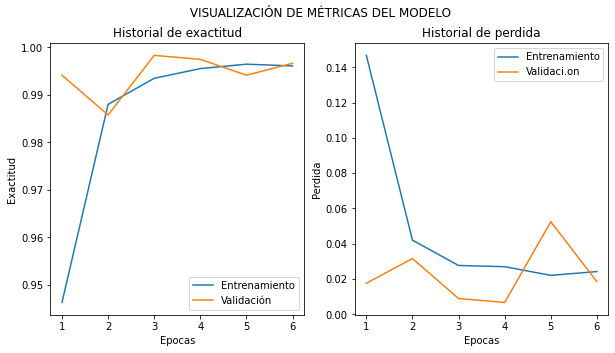

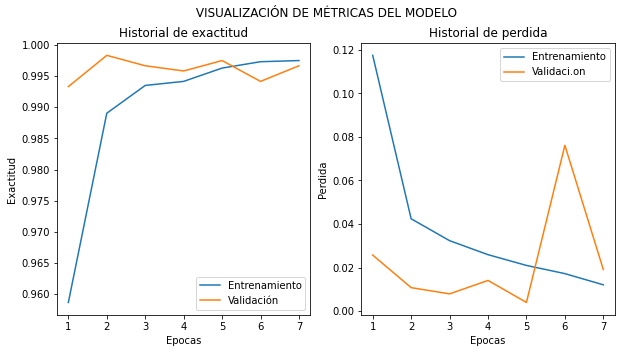

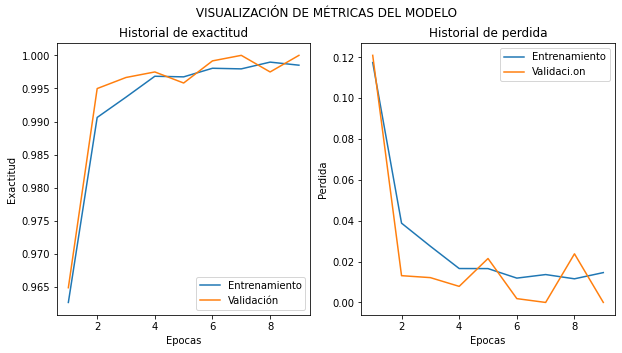

In [ ]:
#%% MIRANDO LAS GRÁFICAS DE PÉRDIDA DE PRECISIÓN PARA CADA ITERACION

def Acc_Loss_Plot(results):
    
  for fold in results:
      
    acc = fold.history['acc']
    val_acc = fold.history['val_acc']
    loss = fold.history['loss']
    val_loss = fold.history['val_loss']

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))
    fig.suptitle(" VISUALIZACIÓN DE MÉTRICAS DEL MODELO ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('Historial de exactitud')
    ax1.set_xlabel('Epocas')
    ax1.set_ylabel('Exactitud')
    ax1.legend(['Entrenamiento', 'Validación'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('Historial de perdida')
    ax2.set_xlabel('Epocas')
    ax2.set_ylabel('Perdida')
    ax2.legend(['Entrenamiento', 'Validaci.on'])
    plt.show()
  
Acc_Loss_Plot(cv_results)

Cargamos un modelo previamente entrenado en el archivo "Brain_model.h5".

El modelo se compila con un optimizador RMSprop con una tasa de aprendizaje de 0,0001 y la función de pérdida sparse_categorical_crossentropy.

Utilizamos el objeto ImageDataGenerator para preprocesar el conjunto de prueba. 
Se establece el tamaño de la imagen de destino en "size", se especifica que el modo de color es "grayscale" y se establece la clase de modo en "None".

Finalmente, se hacen predicciones sobre el conjunto de prueba usando el modelo cargado y se imprimen las etiquetas predichas (0 para 'random' y 1 para 'mri').

In [ ]:
#%% CARGANDO EL MODELO

keras_model = keras.models.load_model('Brain_model.h5')
keras_model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                    loss='sparse_categorical_crossentropy', metrics =[ 'acc'])

# Predicciones en el conjunto de prueba

datagen = ImageDataGenerator(rescale = 1./255)

test_set = datagen.flow_from_dataframe(df_test,
                                       directory = '/content/drive/MyDrive/Imagen /discriminador_mri/*.jpg',
                                       x_col = 'image',
                                       y_col = None,
                                       target_size = size,
                                       color_mode = 'grayscale',
                                       class_mode = None,
                                       batch_size = 10,
                                       shuffle = False,
                                       interpolation = 'bilinear')

predictions = keras_model.predict(test_set)
predictions = predictions.argmax(axis=-1)
print("Donde 0 = 'random'")
print("Donde 1 = 'mri'")
print(predictions)

Found 136 validated image filenames.
14/14 [==============================] - 3s 217ms/step
Donde 0 = 'random'
Donde 1 = 'mri'
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Utilizamos una list comprehension para convertir los valores de 1 en "mri" y los valores de 0 en "random". 

La lista "predictions" contiene los resultados de la clasificación y la lista "pred" almacenará los resultados convertidos.

In [ ]:
pred = []
[pred.append('random') if i == 1 else pred.append('mri') for i in predictions]
print(pred)

['random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'random', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri', 'mri'

Obtenemos las primeras 10 predicciones hechas por el modelo en el conjunto de prueba. 

Almacenamoos las primeras 10 imágenes del conjunto de prueba en la lista images10 y las primeras 10 predicciones en la lista prediction10. 

Creamos un objeto final_pred que es una tupla que combina cada imagen con su correspondiente predicción.

In [ ]:
#%% OBTENER PREDICCIONES

images10 = [test_set[0][0],test_set[0][1],test_set[0][2],test_set[0][3],test_set[0][4],
            test_set[0][5],test_set[0][6],test_set[0][7],test_set[0][8],test_set[0][9]]
            
prediction10 = pred[0:9]
final_pred = zip(images10,prediction10)

Visualizamos las predicciones realizadas por el modelo de Deep Lerning en un conjunto de imágenes de prueba. 

La función "pre_visualization" toma dos argumentos: 
* los datos de las imágenes 
* las predicciones realizadas por el modelo. 

Con un bucle "for" mostramos cada imagen y su correspondiente predicción en un gráfico separado. 

La función "plt.imshow" se utiliza para mostrar la imagen en escala de grises y "plt.title" se utiliza para agregar un título a la imagen que indica la predicción del modelo.

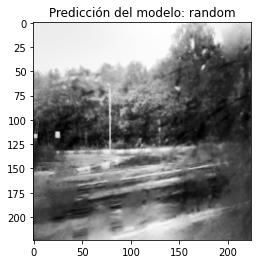

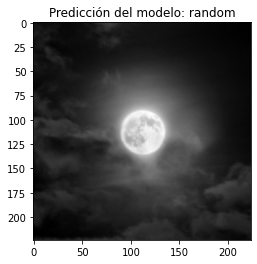

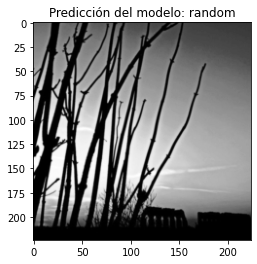

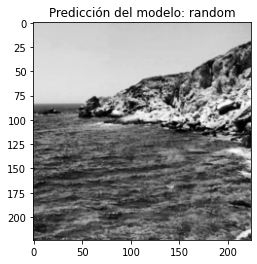

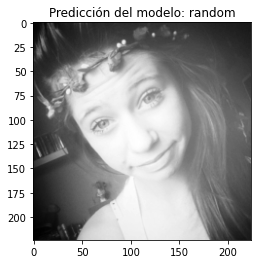

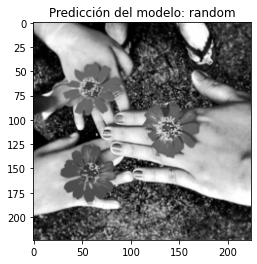

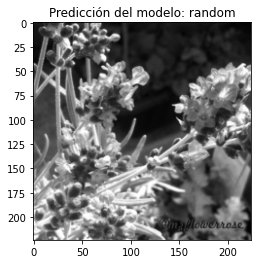

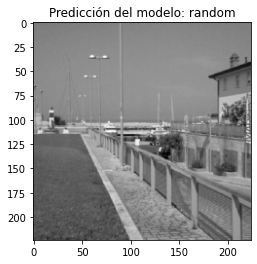

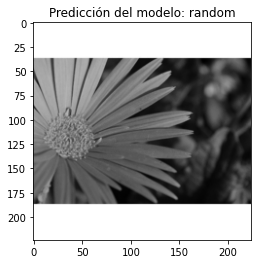

In [ ]:
def pre_visualization(data, predictions):
    
  for image,pred in final_pred:
      plt.imshow(image.reshape(224,224), cmap = 'gray')
      plt.title("Predicción del modelo: " + str(pred))
      plt.show()
        
pre_visualization(images10,prediction10)